# Singular Value Decomposition

## Dependency

In [19]:
import numpy as np
import matplotlib.pyplot as plt

## Singular value decomposition (SVD)

SVD is similar to Eigendecomposition, but SVD is more general because it works on a rectangular matrix as well as a square matrix. Eigendecomposition only works for a square matrix. There are ways to think. Think eigendecomposition is a special case of SVD. Or think SVD is an extension of eigendecomposition.

- $A A^T$ and $A^T A$ produce a square symmetric matrix
- $C(A A^T) = C(A)$, column space of $A$
- $R(A^T A) = R(A)$, row space of $A$

### Big picture

The goal of SVD is to decompose a given matrix $A$ into 3 matrices.

$$
A = U \Sigma V^T
$$

$A$ is a given matrix, mxn

$U$ is a **orthogonal matrix, orthogonal basis for column space** of $A$, mxm. $U$ is called **left singular vectors**.

$\Sigma$ is a **diagonal matirx with singular values** of $A$ on diagonal elements, mxn

$V^T$ is a **orthogonal matrix, orthogonal basis for row space** of $A$, nxn. $V^T$ is called **right singular vectors**.

It looks like a **diagonalization** that eigendecomposition produces, $A = V \Lambda V^{-1} = V \Lambda V^T$

When $A$ is a square symmetric matrix, $U = V$.

### How to compute $V$ in SVD

Start from the SVD equation and **left-multiply it by $A^T$**

$$
A = U \Sigma V^T
$$
$$
A^T A = (U \Sigma V^T)^T U \Sigma V^T
$$

By **LIVE EVIL rule**,

$$
A^T A = V^{TT} \Sigma^T U^T U \Sigma V^T
$$

Becuase $U$ is an **orthogonal matrix**, it means that $U^T = U^{-1}$

$$
A^T A = V^{TT} \Sigma^T U^{-1} U \Sigma V^T
$$

Because $A^{-1} A = I$,

$$
A^T A = V^{TT} \Sigma^T I \Sigma V^T
$$

Because a transpose of a transposed matrix goes back to the original matrix,

$$
A^T A = V \Sigma^T \Sigma V^T
$$

Because $\Sigma$ is a **diagonal matrix**, $\Sigma^T = \Sigma$, and powers of a diagonal matrix is powers of each diagonal element in a matrix,

$$
A^T A = V \Sigma^2 V^T
$$

Because $A^T A$ is a square, this equation can be read as **eigendecomposition** of $A^T A$. So $V$ is **eigenvector** of $A^T A$ and $\Sigma^2$ is **eigenvalue** of $A^T A$.

### How to compute $U$ in SVD

Start from the SVD equation and **right-multiply it by $A^T$**

$$
A = U \Sigma V^T
$$
$$
A A^T = U \Sigma V^T (U \Sigma V^T)^T
$$
$$
A A^T = U \Sigma V^T V^{TT} \Sigma^T U^T
$$
$$
A A^T = U \Sigma V^T V \Sigma^T U^T
$$
$$
A A^T = U \Sigma V^{-1} V \Sigma^T U^T
$$
$$
A A^T = U \Sigma I \Sigma^T U^T
$$
$$
A A^T = U \Sigma \Sigma^T U^T
$$
$$
A A^T = U \Sigma \Sigma U^T
$$
$$
A A^T = U \Sigma^2 U^T
$$

So to compute $U$, apply **eigendecomposition** to $A A^T$, and the **eigenvector** is $U$.

## Relationship between SVD and Eigendecomposition for a square symmetric matrix

We use square matrix because Eigendecomposition is only for square matrix and we want to compare SVD and Eigendecomposition.

For a symmetric matrix, SVD and Eigendecomposition produce the **same result**, except there could be sign flip in eigenvectors.

A
[[ 3.  -0.3  0.9 -2.9 -0.2]
 [-0.3  1.5 -0.4 -1.2  0.7]
 [ 0.9 -0.4  3.3 -2.1 -0.7]
 [-2.9 -1.2 -2.1 10.   4. ]
 [-0.2  0.7 -0.7  4.   4.8]]

Eigenvalue: L
[13.4  0.1  2.2  3.8  3.1]

Eigenvector: W
[[-0.3  0.4  0.7  0.5  0.1]
 [-0.   0.7 -0.5  0.2 -0.5]
 [-0.2  0.1 -0.5  0.3  0.8]
 [ 0.8  0.4  0.1 -0.1  0.3]
 [ 0.4 -0.4 -0.1  0.8 -0.2]]

Left singular vector: U
[[-0.3  0.5  0.1 -0.7 -0.4]
 [-0.   0.2 -0.5  0.5 -0.7]
 [-0.2  0.3  0.8  0.5 -0.1]
 [ 0.8 -0.1  0.3 -0.1 -0.4]
 [ 0.4  0.8 -0.2  0.1  0.4]]

Singular values: S
[13.4  3.8  3.1  2.2  0.1]

Right singular vector: V
[[-0.3 -0.  -0.2  0.8  0.4]
 [ 0.5  0.2  0.3 -0.1  0.8]
 [ 0.1 -0.5  0.8  0.3 -0.2]
 [-0.7  0.5  0.5 -0.1  0.1]
 [-0.4 -0.7 -0.1 -0.4  0.4]]

np.argsort(L): [4 3 2 1 0]
sidx: [0 3 4 2 1]



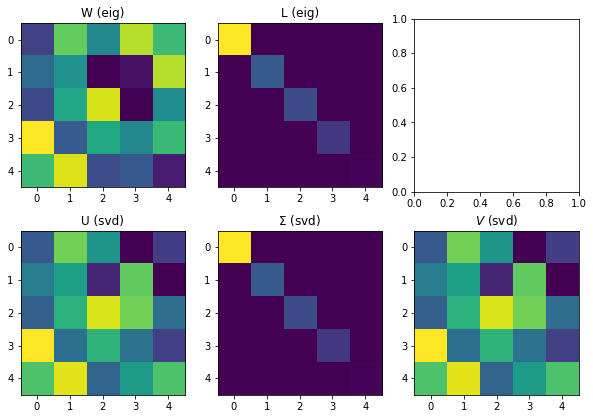

W - U
[[-0.   0.  -0.   1.4  0.8]
 [ 0.   0.  -0.  -0.9  1.4]
 [-0.   0.  -0.  -1.   0.3]
 [-0.  -0.  -0.   0.2  0.8]
 [ 0.  -0.  -0.  -0.3 -0.8]]

W + U
[[-0.5  1.   0.2 -0.  -0. ]
 [-0.1  0.3 -1.1  0.  -0. ]
 [-0.4  0.6  1.5  0.   0. ]
 [ 1.7 -0.3  0.6  0.   0. ]
 [ 0.8  1.5 -0.4 -0.  -0. ]]

U - V
[[-0.  0.  0. -0.  0.]
 [ 0. -0. -0. -0. -0.]
 [-0.  0.  0.  0.  0.]
 [-0.  0.  0. -0.  0.]
 [-0.  0. -0.  0.  0.]]

L - Sigma
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]



In [26]:
# Make a square symmetric matrix
A = np.random.randn(5, 5)
A = A.T @ A

print('A')
print(np.round(A, 1))
print()

# Compute eigendecomposition and singular value decomposition
# L: eigenvalue, W: eigenvector
L, W = np.linalg.eig(A)
# V: right singular vectors
U, S, V = np.linalg.svd(A)

print('Eigenvalue: L')
print(np.round(L, 1))
print()
print('Eigenvector: W')
print(np.round(W, 1))
print()

print('Left singular vector: U')
print(np.round(U, 1))
print()
print('Singular values: S')
print(np.round(S, 1))
print()
print('Right singular vector: V')
print(np.round(V, 1))
print()

# Sort eigen outputs by descending order
# np.argsort(L) returns a list of indices in ascending order by the value of the list
sidx = np.argsort(L)[::-1]
L = L[sidx]
W = W[:, sidx]

print(f'np.argsort(L): {np.argsort(L)}')
print(f'sidx: {sidx}')
print()

# Visualize
fig, ax = plt.subplots(2, 3, figsize=(10, 7))

# Eigendecomposition
ax[0, 0].imshow(W)
ax[0, 0].set_title('W (eig)')
ax[0, 1].imshow(np.diag(L))
ax[0, 1].set_title('L (eig)')

# SVD
ax[1, 0].imshow(U)
ax[1, 0].set_title('U (svd)')
ax[1, 1].imshow(np.diag(S))
ax[1, 1].set_title('$\Sigma$ (svd)')
ax[1, 2].imshow(V.T)
ax[1, 2].set_title('$V$ (svd)')

plt.show()

print('W - U')
print(np.round(W - U, 1))
print()

print('W + U')
print(np.round(W + U, 1))
print()

print('U - V')
print(np.round(U - V.T, 1))
print()

print('L - Sigma')
print(np.round(np.diag(L) - np.diag(S), 1))
print()

## Relationship between singular value and eigenvalue

For symmetric matrix, singular value and eigenvalue are the same, but non-symmetric square matrix, singular value and eigevalue are not the same.
1. Eigenvalue of $A^T A$ = (Singular value of $A$)$^2$ (where $A^T A$ is a square symmetric matrix)
2. Eigenvalue of $A^T A$ = Singular value of $A^T A$ (where $A^T A$ is a square symmetric matrix)
3. Eigenvalue of $A$ $\neq$ Singular value of $A$ (where $A$ is a square matrix)

In [35]:
# 1.
A = np.array([
    [3, 1, 0],
    [1, 1, 0]
])

print('Eigenvalue')
print(np.sort(np.linalg.eig(A.T @ A)[0]))
print('Singular value')
print(np.sort(np.linalg.svd(A)[1])**2)
print()

# 2.
print('Eigenvalue')
print(np.sort(np.linalg.eig(A.T @ A)[0]))
print('Singular value')
print(np.sort(np.linalg.svd(A.T @ A)[1]))
print()

# 3a, real-value
A = np.array([
    [3, 1, 0],
    [1, 1, 0],
    [1, 1, 1]
])
print('Eigenvalue')
print(np.sort(np.linalg.eig(A)[0]))
print('Singular value')
print(np.sort(np.linalg.svd(A)[1]))
print()

# 3b, complex-value
A = np.random.randn(3, 3)
print('Eigenvalue')
print(np.sort(np.linalg.eig(A)[0]))
print('Singular value')
print(np.sort(np.linalg.svd(A)[1]))
print()

Eigenvalue
[ 0.          0.34314575 11.65685425]
Singular value
[ 0.34314575 11.65685425]

Eigenvalue
[ 0.          0.34314575 11.65685425]
Singular value
[ 0.          0.34314575 11.65685425]

Eigenvalue
[0.58578644 1.         3.41421356]
Singular value
[0.49384652 1.10038368 3.68039011]

Eigenvalue
[-1.26888207+0.j         -0.1939345 -1.31828408j -0.1939345 +1.31828408j]
Singular value
[0.47939343 1.55934301 3.01372882]



In [36]:
# From 150